## Práctica 7
## SVM
## Vianey Maravilla Pérez

**Especificaciones:**
1.  Dataset a utilizar: heart.csv (utilizado en la práctica 1)
2.  Mezcla los datos con *random_state = 0*
3.  Crea un conjunto de entrenamiento con el 70% y el conjunto de prueba con el 30 % restante 
4.  Con el conjunto de entrenamiento encuenta C+, C+, C y ||C||
5.  Predice las clases del conjunto de prueba

**Salida del programa:**
1.  C+
2.  C-
3.  C
4.  ||C||
5.  Reporte de clasificación
6.  Gráfica de la matriz de confusión


In [1]:
# Importamos las librerias necesarias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Leemos el archivo csv 'heart.csv' y lo visualizamos 
heart = pd.read_csv(r'heart.csv')
print(heart)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [4]:
# Definimos las variables
X = heart.drop(heart.columns[[len(heart.columns)-1]], axis = 1).values
y = heart['target'].values

In [5]:
# Imprimos lo siguiente
print(X.shape) # Devuelve una tupla con el tamaño del array

(303, 13)


In [6]:
# Hacemos la separación de los conjuntos de entrenamiento y el conjunto de prueba con las variables anteriormente definidas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)

In [8]:
# Ahora visualizamos lo anterior
print('X_TRAIN:', X_train)
print('----------------')
print('X_TRAIN SHAPE:', X_train.shape)
print('----------------')
print('X_TEST:', X_test)
print('----------------')
print('X_TEST SHAPE:', X_test.shape)
print('----------------')
print('y_TRAIN:', y_train)
print('----------------')
print('y_TRAIN SHAPE:', y_train.shape)
print('----------------')
print('y_TEST:', y_test)
print('----------------')
print('y_TEST SHAPE:', y_test.shape)

X_TRAIN: [[62.  1.  1. ...  2.  0.  2.]
 [69.  1.  3. ...  1.  1.  2.]
 [61.  1.  0. ...  2.  1.  3.]
 ...
 [56.  1.  3. ...  1.  0.  3.]
 [47.  1.  2. ...  2.  0.  2.]
 [58.  1.  1. ...  1.  0.  2.]]
----------------
X_TRAIN SHAPE: (212, 13)
----------------
X_TEST: [[70.  1.  0. ...  0.  0.  3.]
 [64.  1.  3. ...  1.  0.  3.]
 [59.  1.  3. ...  1.  0.  3.]
 ...
 [51.  1.  2. ...  1.  0.  2.]
 [67.  1.  0. ...  1.  0.  2.]
 [77.  1.  0. ...  2.  3.  2.]]
----------------
X_TEST SHAPE: (91, 13)
----------------
y_TRAIN: [1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0
 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0]
----------------
y_TRAIN SHAPE: (212,)
----

In [9]:
# Índices de instancias positivas
i_positivos = np.asarray(y_train == 1).nonzero()
print(f'Índices positivos:\n {i_positivos}')

Índices positivos:
 (array([  0,   1,   3,   4,   7,  10,  12,  16,  17,  18,  23,  25,  26,
        27,  29,  30,  31,  33,  34,  35,  36,  37,  38,  39,  42,  43,
        45,  46,  51,  53,  54,  56,  57,  58,  59,  60,  61,  64,  68,
        69,  70,  72,  74,  75,  77,  78,  79,  80,  81,  84,  86,  89,
        92,  93,  94,  97,  98, 100, 102, 104, 105, 107, 108, 109, 111,
       115, 116, 117, 118, 120, 122, 124, 125, 126, 128, 130, 134, 135,
       137, 139, 140, 143, 145, 146, 148, 149, 150, 151, 152, 155, 156,
       157, 160, 161, 162, 163, 164, 166, 167, 169, 170, 172, 173, 176,
       177, 178, 182, 185, 188, 190, 191, 196, 198, 199, 200, 205, 209,
       210], dtype=int64),)


In [10]:
# Índices de instancias positivas
i_negativos = np.asarray(y_train == 0).nonzero()
print(f'Índices negativos:\n {i_negativos}')

Índices negativos:
 (array([  2,   5,   6,   8,   9,  11,  13,  14,  15,  19,  20,  21,  22,
        24,  28,  32,  40,  41,  44,  47,  48,  49,  50,  52,  55,  62,
        63,  65,  66,  67,  71,  73,  76,  82,  83,  85,  87,  88,  90,
        91,  95,  96,  99, 101, 103, 106, 110, 112, 113, 114, 119, 121,
       123, 127, 129, 131, 132, 133, 136, 138, 141, 142, 144, 147, 153,
       154, 158, 159, 165, 168, 171, 174, 175, 179, 180, 181, 183, 184,
       186, 187, 189, 192, 193, 194, 195, 197, 201, 202, 203, 204, 206,
       207, 208, 211], dtype=int64),)


In [12]:
# A partir de los indices positivos anteriores hacemos la separación de las instancias correspondientes
X_tp = X_train[i_positivos]
y_tp = y_train[i_positivos]

# Visualizamos lo siguiente
print(X_tp.shape)
print(type(X_tp))
print('----------------')
print(y_tp.shape)
print(type(y_tp))

(118, 13)
<class 'numpy.ndarray'>
----------------
(118,)
<class 'numpy.ndarray'>


In [13]:
# A partir de los indices negativos anteriores hacemos la separación de las instancias correspondientes
X_tn = X_train[i_negativos]
y_tn = y_train[i_negativos]

# Visualizamos lo siguiente
print(X_tn.shape)
print(type(X_tn))
print('----------------')
print(y_tn.shape)
print(type(y_tn))

(94, 13)
<class 'numpy.ndarray'>
----------------
(94,)
<class 'numpy.ndarray'>


In [20]:
# Se calcula de la siguiente manera el C - POSTIVO

# suma positiva
s_p = 0
for vector in X_tp:
    s_p = np.add(s_p, vector)
    print('SUMA POSITIVA:',s_p)
    print('----------------')
    
CPositivo = s_p / len(X_tp)
print(f'C POSITIVO\n{CPositivo}')

SUMA POSITIVA: [ 62.   1.   1. 128. 208.   1.   0. 140.   0.   0.   2.   0.   2.]
----------------
SUMA POSITIVA: [1.31e+02 2.00e+00 4.00e+00 2.88e+02 4.42e+02 2.00e+00 0.00e+00 2.71e+02
 0.00e+00 1.00e-01 3.00e+00 1.00e+00 4.00e+00]
----------------
SUMA POSITIVA: [1.70e+02 3.00e+00 6.00e+00 4.28e+02 7.63e+02 2.00e+00 0.00e+00 4.53e+02
 0.00e+00 1.00e-01 5.00e+00 1.00e+00 6.00e+00]
----------------
SUMA POSITIVA: [2.340e+02 4.000e+00 6.000e+00 5.560e+02 1.026e+03 2.000e+00 1.000e+00
 5.580e+02 1.000e+00 3.000e-01 6.000e+00 2.000e+00 9.000e+00]
----------------
SUMA POSITIVA: [2.810e+02 5.000e+00 8.000e+00 6.860e+02 1.279e+03 2.000e+00 2.000e+00
 7.370e+02 1.000e+00 3.000e-01 8.000e+00 2.000e+00 1.100e+01]
----------------
SUMA POSITIVA: [3.440e+02 5.000e+00 1.000e+01 8.210e+02 1.531e+03 2.000e+00 2.000e+00
 9.090e+02 1.000e+00 3.000e-01 1.000e+01 2.000e+00 1.300e+01]
----------------
SUMA POSITIVA: [3.870e+02 6.000e+00 1.000e+01 9.710e+02 1.778e+03 2.000e+00 3.000e+00
 1.080e+03 1.000

In [21]:
# Se calcula de la siguiente manera el C - NEGATIVO

# suma positiva
s_n = 0
for vector in X_tn:
    s_n = np.add(s_n, vector)
    print('SUMA NEGATIVA:',s_n)
    print('----------------')
    
CNegativo = s_n / len(X_tn)
print(f'C NEGATIVO\n{CNegativo}')

SUMA NEGATIVA: [ 61.    1.    0.  140.  207.    0.    0.  138.    1.    1.9   2.    1.
   3. ]
----------------
SUMA NEGATIVA: [127.    2.    1.  300.  453.    0.    1.  258.    2.    1.9   3.    4.
   4. ]
----------------
SUMA NEGATIVA: [184.    3.    1.  410.  788.    0.    2.  401.    3.    4.9   4.    5.
   7. ]
----------------
SUMA NEGATIVA: [243.    4.    1.  574.  964.    1.    2.  491.    3.    5.9   5.    7.
   8. ]
----------------
SUMA NEGATIVA: [3.050e+02 4.000e+00 1.000e+00 7.120e+02 1.258e+03 2.000e+00 3.000e+00
 5.970e+02 3.000e+00 7.800e+00 6.000e+00 1.000e+01 1.000e+01]
----------------
SUMA NEGATIVA: [3.75e+02 5.00e+00 1.00e+00 8.42e+02 1.58e+03 2.00e+00 3.00e+00 7.06e+02
 3.00e+00 1.02e+01 7.00e+00 1.30e+01 1.20e+01]
----------------
SUMA NEGATIVA: [4.270e+02 6.000e+00 1.000e+00 9.700e+02 1.835e+03 2.000e+00 4.000e+00
 8.670e+02 4.000e+00 1.020e+01 9.000e+00 1.400e+01 1.500e+01]
----------------
SUMA NEGATIVA: [4.860e+02 7.000e+00 4.000e+00 1.130e+03 2.108e+03 2.00

In [26]:
# Se calcula de la siguiente manera C
C = np.add(CNegativo, CPositivo) / 2
# Visualizamos a C
print(f'C es:\n {C}')

C es:
 [5.46803101e+01 6.64893617e-01 9.16245943e-01 1.31729805e+02
 2.48193833e+02 1.64623152e-01 5.44536603e-01 1.48644248e+02
 3.68824378e-01 1.15064912e+00 1.39127299e+00 7.52524342e-01
 2.29552831e+00]


In [31]:
# Se calcula de la siguiente manera la norma de C
C_norma = np.linalg.norm(C)
# La visualizamos
print(f'La norma de C es:\n{C_norma}')

La norma de C es:
322.565971485979


In [32]:
# Se calculan las proyecciones con y como predicción de la clasificación para las instancias respecto a las pruebas
proyeccion = []
predict_y = []
for vector in X_test:
    p_p = np.dot(vector, C)
    proyecciones = p_p / C_norma
    proyeccion.append(proyecciones)
    if(proyecciones < C_norma):
        predict_y.append(0)
    elif(proyecciones > C_norma):
        predict_y.append(1)
    else:
        predict.append(-1)

In [35]:
# Visualización de los resultados anteriores en conjunto
print(f' C Positivo:\n {CPositivo}')
print('----------------')
print(f' C Negativo:\n {CNegativo}')
print('----------------')
print(f' C:\n {C}')
print('----------------')
print(f' C Norma:\n {C_norma}')


 C Positivo:
 [5.32542373e+01 5.00000000e-01 1.36440678e+00 1.28991525e+02
 2.45398305e+02 1.27118644e-01 5.67796610e-01 1.58203390e+02
 1.52542373e-01 5.94915254e-01 1.60169492e+00 3.13559322e-01
 2.10169492e+00]
----------------
 C Negativo:
 [5.61063830e+01 8.29787234e-01 4.68085106e-01 1.34468085e+02
 2.50989362e+02 2.02127660e-01 5.21276596e-01 1.39085106e+02
 5.85106383e-01 1.70638298e+00 1.18085106e+00 1.19148936e+00
 2.48936170e+00]
----------------
 C:
 [5.46803101e+01 6.64893617e-01 9.16245943e-01 1.31729805e+02
 2.48193833e+02 1.64623152e-01 5.44536603e-01 1.48644248e+02
 3.68824378e-01 1.15064912e+00 1.39127299e+00 7.52524342e-01
 2.29552831e+00]
----------------
 C Norma:
 322.565971485979


In [36]:
# Hacemos datos más centrados de las proyecciones
datosFinales = {"Normas": np.repeat(C_norma, len(proyeccion)), "Proyecciones": proyeccion, "Clasificaciones": predict_y, "Valores originales / reales": y_test}
# Lo convertimos en un dataframe
tablas = pd.DataFrame(datosFinales)
# Visualizamos el data frame para mejor comprensión
print(tablas)

        Normas  Proyecciones  Clasificaciones  Valores originales / reales
0   322.565971    262.601035                0                            0
1   322.565971    326.400974                1                            1
2   322.565971    374.330825                1                            0
3   322.565971    324.749625                1                            0
4   322.565971    308.667209                0                            1
..         ...           ...              ...                          ...
86  322.565971    339.888937                1                            0
87  322.565971    305.710910                0                            0
88  322.565971    324.735933                1                            1
89  322.565971    275.463588                0                            0
90  322.565971    372.694514                1                            0

[91 rows x 4 columns]


In [37]:
# Accuracy
accuracy = accuracy_score(y_test, predict_y)
# Visualización
print(f'Accuracy:\n{accuracy}')

Accuracy:
0.4835164835164835


In [40]:
# Instancias predichas correctamente
Instancias_correctas = accuracy_score(y_test, predict_y, normalize = False)
# Visualización
print(f'Instancias predichas correctamente:\n{Instancias_correctas} de un total de {len(y_test)}')

Instancias predichas correctamente:
44 de un total de 91


In [41]:
# Reporte de Clasificación 
report = classification_report(y_test, predict_y, target_names = ['0','1'])
# Visualización
print(f'Reporte de Clasificación:\n{report}')

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.47      0.57      0.52        44
           1       0.50      0.40      0.45        47

    accuracy                           0.48        91
   macro avg       0.49      0.49      0.48        91
weighted avg       0.49      0.48      0.48        91



In [42]:
# Matriz de confusión
matrizC = confusion_matrix(y_test, predict_y, labels = [0,1])
# Visualización 
print(f'Matriz de Confusión:\n{matrizC}')

Matriz de Confusión:
[[25 19]
 [28 19]]


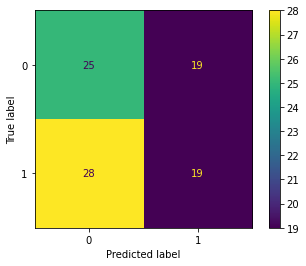

In [47]:
# Matriz de confusión ploteo
matrixC = ConfusionMatrixDisplay(confusion_matrix = matrizC, display_labels = ['0','1'])
disp = matrixC
disp.plot()
plt.show() # Se usa para mostrar todas las figura

# RESUMEN DE RESULTADOS

Accuracy:
0.4835164835164835
_____________________________________
Instancias predichas correctamente:
44 de un total de 91
_____________________________________
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.47      0.57      0.52        44
           1       0.50      0.40      0.45        47

    accuracy                           0.48        91
   macro avg       0.49      0.49      0.48        91
weighted avg       0.49      0.48      0.48        91

_____________________________________
Matriz de Confusión:
[[25 19]
 [28 19]]
_____________________________________


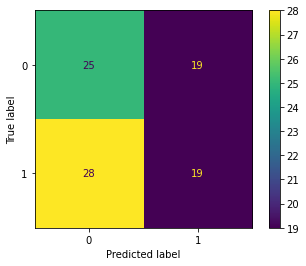

In [49]:
print(f'Accuracy:\n{accuracy}')
print('_____________________________________')
print(f'Instancias predichas correctamente:\n{Instancias_correctas} de un total de {len(y_test)}')
print('_____________________________________')
print(f'Reporte de Clasificación:\n{report}')
print('_____________________________________')
print(f'Matriz de Confusión:\n{matrizC}')
print('_____________________________________')
disp.plot()
plt.show()